In [118]:
import pandas as pd

**Attribute Information**

    1. Age: age of the patient [years]
    2. Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]


In [119]:
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [120]:
heart_df.shape

(918, 12)

In [121]:
print(heart_df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR   
count  918.000000  918.000000   918.000000  918.000000  918.000000  \
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [122]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Let's visualize the distribution of columns

<Axes: xlabel='Age', ylabel='Count'>

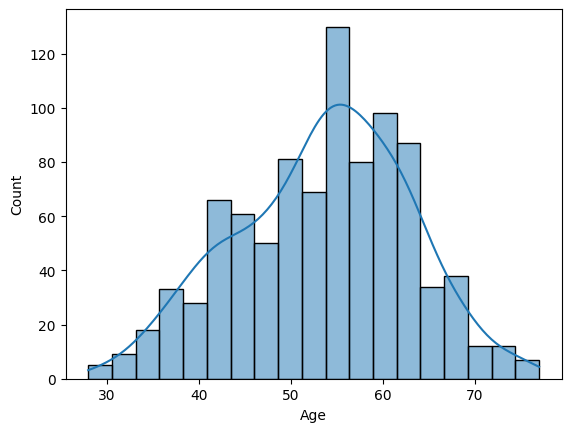

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(heart_df['Age'], kde=True)


Age is close to the normal distribution. 

<Axes: >

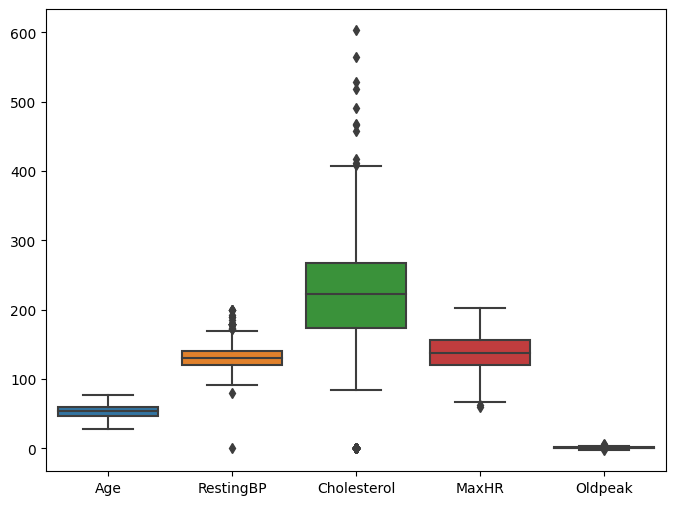

In [124]:
# Observe distribution of numeric values
plt.figure(figsize=(8, 6))
sns.boxplot(data=heart_df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])

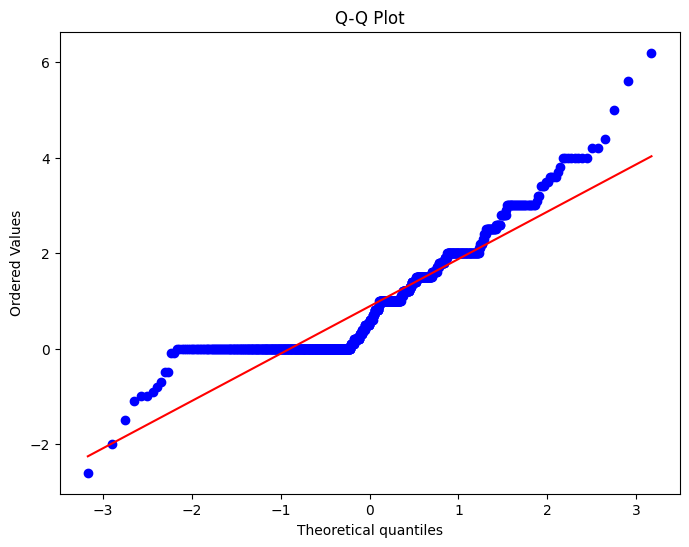

In [125]:
from scipy.stats import probplot

plt.figure(figsize=(8, 6))
probplot(heart_df['Oldpeak'], plot=plt)
plt.title('Q-Q Plot')
plt.show()

Oldpeak values are not normally distributed. So, detect outliers with IQR range

In [126]:
Q1 = heart_df['Oldpeak'].quantile(0.25)
Q3 = heart_df['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR
outliers = heart_df[(heart_df['Oldpeak'] < lower_bound) | (heart_df['Oldpeak'] > upper_bound)]


In [127]:
heart_df = heart_df.iloc[~heart_df.index.isin(outliers.index)]
heart_df.shape

(915, 12)

In [128]:
def remove_outliers_zscore(df, column_name, threshold=2):
    mean = df[column_name].mean()
    std = df[column_name].std()
    df['Z_score'] = (df[column_name] - mean) / std
    df_outliers_removed = df[abs(df['Z_score']) <= threshold]
    return df_outliers_removed.drop(columns='Z_score')

In [129]:
heart_df = remove_outliers_zscore(heart_df, 'RestingBP')
heart_df = remove_outliers_zscore(heart_df, 'Cholesterol')
heart_df = remove_outliers_zscore(heart_df, 'MaxHR')
heart_df.shape

(829, 12)

<Axes: >

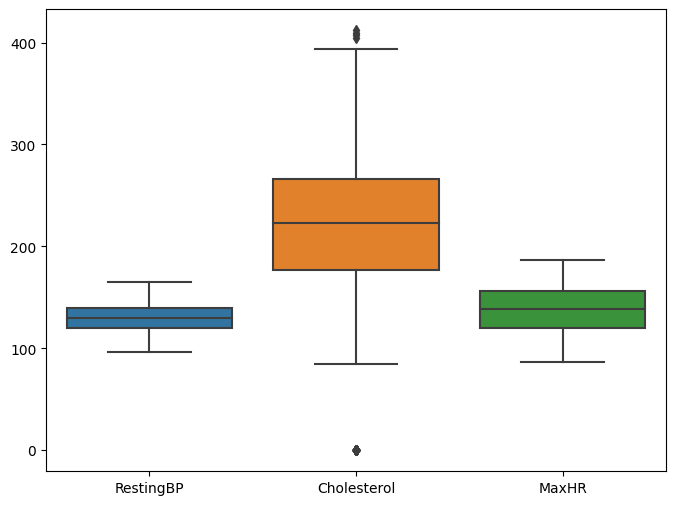

In [130]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=heart_df[['RestingBP', 'Cholesterol', 'MaxHR']])

Convert categorical text values to numeric values

In [131]:
print(heart_df['ExerciseAngina'].unique())

['N' 'Y']


In [132]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
heart_df['ChestPainType'] = labelencoder.fit_transform(heart_df['ChestPainType'])
heart_df['RestingECG'] = labelencoder.fit_transform(heart_df['RestingECG'])
heart_df['ST_Slope'] = labelencoder.fit_transform(heart_df['ST_Slope'])
heart_df['ExerciseAngina'] = labelencoder.fit_transform(heart_df['ExerciseAngina'])
heart_df['Sex'] = labelencoder.fit_transform(heart_df['Sex'])

In [133]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


Scale necessary columns

<Axes: >

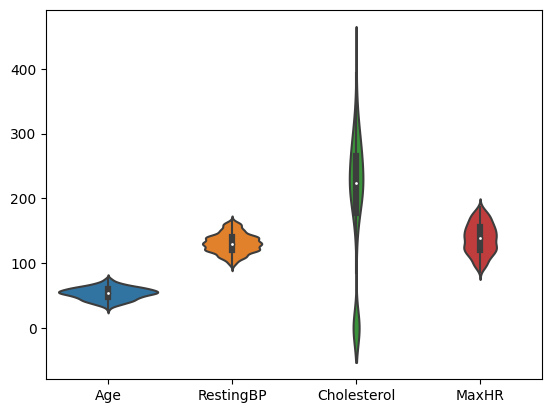

In [134]:
sns.violinplot(data=heart_df[['Age','RestingBP', 'Cholesterol', 'MaxHR']])

<Axes: >

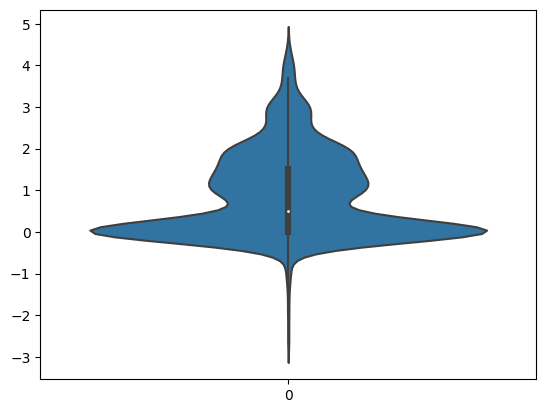

In [135]:
sns.violinplot(data=heart_df['Oldpeak'])

Numeric columns except Oldpeak are close to normal distribution. But lets use RobustScaler to make sure all of them scaled properly. Before applying a scaler, lets check if the columns are already scaled or not. 

In [136]:
from scipy.stats import zscore
z_scores = zscore(heart_df[['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])
z_scores

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,-1.428174,0.617177,0.871292,1.444976,-0.847280
1,-0.467863,1.965194,-0.191618,0.765180,0.131804
2,-1.748277,-0.056831,0.812783,-1.699079,-0.847280
3,-0.574564,0.482375,0.139932,-1.274207,0.621347
4,0.065642,1.291186,-0.045346,-0.679386,-0.847280
...,...,...,...,...,...
913,-0.894668,-1.404848,0.627506,-0.254513,0.327621
914,1.559458,0.886780,-0.064849,0.127872,2.481608
915,0.385746,-0.056831,-0.669440,-0.976796,0.327621
916,0.385746,-0.056831,0.354464,1.529950,-0.847280


In [137]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
heart_df[['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] = rbs.fit_transform(heart_df[['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])

In [138]:
X = heart_df.drop('HeartDisease', axis=1)
y = heart_df['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Create a standalone SVM Model**

In [143]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize the SVM classifier rbf kernel. 
svm_classifier = SVC(kernel='rbf')

n_splits = 3
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(svm_classifier, X, y, cv=stratified_kfold, scoring='accuracy')
mean_accuracy = np.mean(accuracy_scores)

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.8552468651354227


Create a SVM Model with Bagging

In [148]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='rbf')

# Initialize the BaggingClassifier with SVM as the base estimator
bag = BaggingClassifier(base_estimator=svm_classifier, n_estimators=10, random_state=42)

# Train the Bagging model
bag.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bag.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8975903614457831


c:\Users\duygu\OneDrive\Documents\Foundations of Machine Learning Framework\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [149]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
report = classification_report(y_test, y_pred)
print(report)

[[62 11]
 [ 6 87]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        73
           1       0.89      0.94      0.91        93

    accuracy                           0.90       166
   macro avg       0.90      0.89      0.90       166
weighted avg       0.90      0.90      0.90       166



BaggingClassifier train multiple instances of SVM and creates an ensemble model. It improves the overall performance and robustness of the model. 
<br>Mean Accuracy of standalone SVM 0.855
<br>Accuracy of SVM Model with Bagging 0.897
<br>It increased the accuracy of 4%. F1-score is also good, precision and recall are in good balance.

**Create a standalone Decision Tree classifier**

In [145]:
from sklearn.tree import DecisionTreeClassifier

dectree_clf = DecisionTreeClassifier(random_state=0)
n_splits = 3
strat_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=10)
acc_scores = cross_val_score(dectree_clf, X, y, cv=strat_kfold, scoring='accuracy')
mean_acc = np.mean(acc_scores)
print("Mean Accuracy:", mean_acc)

Mean Accuracy: 0.7853075568112454


Create a Decision Tree Model with Bagging

In [150]:
decision_tree_clf = DecisionTreeClassifier()

bag = BaggingClassifier(base_estimator=decision_tree_clf, n_estimators=10, random_state=34)
bag.fit(X_train, y_train)

y_pred = bag.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8614457831325302


c:\Users\duygu\OneDrive\Documents\Foundations of Machine Learning Framework\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [151]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
report = classification_report(y_test, y_pred)
print(report)

[[61 12]
 [11 82]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84        73
           1       0.87      0.88      0.88        93

    accuracy                           0.86       166
   macro avg       0.86      0.86      0.86       166
weighted avg       0.86      0.86      0.86       166



Bagging method get subsets of the data and train each subset with mutliple instances of the decision tree, and collects all the results in an ensemble model. Therefore, it improved accuracy of the model.
<br>Mean accuracy of standalone Decision Tree 0.78
<br>Accuracy of SVM Model with Bagging 0.86
<br>It increased the accuracy of 8%. F1-score is also good, precision and recall are in good balance.

When compare SVM and Decision Tree models in terms of Bagging, SVM has the higher accuracy, but here the point is in which model applying Bagging improves the model more. I makes more sense to use bagging in Decision Tree model because we can avoid overfitting problem in decision trees with bagging. Decision trees are faster to train, so building a ensemble model will be computationally faster than SVM. Also, decision trees may handle imbalanced datasets better. In brief, implementing the decision tree model with bagging will increase the performance of the model further. 